In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import make_column_selector as selector
from tqdm import tqdm

In [ ]:
df1=pd.read_csv("/content/14579.csv")
df2=pd.read_csv("/content/16279.csv")

In [ ]:
len(df1)

14579

In [ ]:
df1.columns

Index(['file_name', 'sha256_hash', 'path', 'year', 'quarter', 'month',
       'method', 'family_name'],
      dtype='object')

In [ ]:
df2.columns

Index(['file_name', 'sha256_hash', 'path', 'year', 'quarter', 'month',
       'method'],
      dtype='object')

In [ ]:
df1['family_name']

0         secneo
1         smsspy
2         dnotua
3        airpush
4         dnotua
          ...   
14574      jiagu
14575      jiagu
14576      jiagu
14577      jiagu
14578      jiagu
Name: family_name, Length: 14579, dtype: object

In [ ]:
df1["method"]

0        refelection
1           renaming
2               code
3        refelection
4         encryption
            ...     
14574           code
14575           code
14576     encryption
14577           code
14578        trivial
Name: method, Length: 14579, dtype: object

In [ ]:
DataSet_Subset=df1[1:25]

In [ ]:
DataSet_Subset

,file_name,sha256_hash,path,year,quarter,month,method,family_name
1,3b8fedc30b7ded43202f0b3677f82bb439bcf2c36a7513...,3b8fedc30b7ded43202f0b3677f82bb439bcf2c36a7513...,2018_Q1_1.7z/renaming,2018,Q1,1,renaming,smsspy
2,8282218eaea68ae3adcf7b9a599679b8220a4c22708d34...,8282218eaea68ae3adcf7b9a599679b8220a4c22708d34...,2018_Q1_1.7z/code,2018,Q1,1,code,dnotua
3,0b466c80cc3a2feb0eb40897053153d6ed2eaee6cb6dfd...,0b466c80cc3a2feb0eb40897053153d6ed2eaee6cb6dfd...,2018_Q1_1.7z/refelection,2018,Q1,1,refelection,airpush
4,f28a664fe93e2f5f5be187f4c347dbdc9719971e0a836d...,f28a664fe93e2f5f5be187f4c347dbdc9719971e0a836d...,2018_Q1_1.7z/encryption,2018,Q1,1,encryption,dnotua
5,8b5620b6948310cf19f187524fde00b069d9dc88a18070...,8b5620b6948310cf19f187524fde00b069d9dc88a18070...,2018_Q1_1.7z/code,2018,Q1,1,code,dnotua
6,f4ca916d8f735df42090424e935765f9cd5dc2d14ad071...,f4ca916d8f735df42090424e935765f9cd5dc2d14ad071...,2018_Q1_1.7z/code,2018,Q1,1,code,skymobi
7,b554f23eefdd44e502752dd67325c1434deff95de35f4e...,b554f23eefdd44e502752dd67325c1434deff95de35f4e...,2018_Q1_1.7z/encryption,2018,Q1,1,encryption,smsreg
8,85df8fda9f56d94bfe6bf296d84de8dfb867056008090c...,85df8fda9f56d94bfe6bf296d84de8dfb867056008090c...,2018_Q1_1.7z/code,2018,Q1,1,code,dnotua
9,b8db20b98c23fe1a19ddd9252fcf011e32fc1e7c10fa35...,b8db20b98c23fe1a19ddd9252fcf011e32fc1e7c10fa35...,2018_Q1_1.7z/encryption,2018,Q1,1,encryption,skymobi
10,250069edd3034c19c2a9717cd727e24cc7e6c348d813d3...,250069edd3034c19c2a9717cd727e24cc7e6c348d813d3...,2018_Q1_1.7z/encryption,2018,Q1,1,encryption,mobidash


In [ ]:

data = df1


categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)
categorical_columns


['file_name', 'sha256_hash', 'path', 'quarter', 'method', 'family_name']

In [ ]:
data_categorical = data[categorical_columns]
data_categorical.head()

,file_name,sha256_hash,path,quarter,method,family_name
0,6647010bf44aa24e874fe574ef1163a1fe86bc9f076b8e...,6647010bf44aa24e874fe574ef1163a1fe86bc9f076b8e...,2018_Q1_1.7z/refelection,Q1,refelection,secneo
1,3b8fedc30b7ded43202f0b3677f82bb439bcf2c36a7513...,3b8fedc30b7ded43202f0b3677f82bb439bcf2c36a7513...,2018_Q1_1.7z/renaming,Q1,renaming,smsspy
2,8282218eaea68ae3adcf7b9a599679b8220a4c22708d34...,8282218eaea68ae3adcf7b9a599679b8220a4c22708d34...,2018_Q1_1.7z/code,Q1,code,dnotua
3,0b466c80cc3a2feb0eb40897053153d6ed2eaee6cb6dfd...,0b466c80cc3a2feb0eb40897053153d6ed2eaee6cb6dfd...,2018_Q1_1.7z/refelection,Q1,refelection,airpush
4,f28a664fe93e2f5f5be187f4c347dbdc9719971e0a836d...,f28a664fe93e2f5f5be187f4c347dbdc9719971e0a836d...,2018_Q1_1.7z/encryption,Q1,encryption,dnotua


In [ ]:
print(f"The dataset is composed of {data_categorical.shape[1]} features")

The dataset is composed of 6 features


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

education_column = data_categorical[["file_name"]]

encoder = OrdinalEncoder().set_output(transform="pandas")
education_encoded = encoder.fit_transform(education_column)
education_encoded

,file_name
0,5755.0
1,3399.0
2,7378.0
3,655.0
4,13804.0
...,...
14574,5397.0
14575,12509.0
14576,1840.0
14577,5057.0


In [ ]:
encoder.categories_

[array(['00022d057443ac60334e3dd676f30a3b4c2837de54c09a4cb85a28d950c4e2a9.apk',
        '0005cae644238953a0889d91dc3f3a786a8265449eca0475d0a2a6ad67e9946d.apk',
        '00060b80d3ed53b12de0e6abfad139acbc16d645bea60720214cd7c3384e52ce.apk',
        ...,
        'ffe4f05e18f2d3dc67eb7e8cefb9c13addf63ed2c6c579f4a73cb7f76faabcfd.apk',
        'ffe8b3df2c235856b043875ab88db3f3bb0fb6f4058025ceb70a99d2b14f1b7d.apk',
        'ffef118615bd8f8190172c0ae0eb2f677810ba46d2c4e4ec88f391b190df5685.apk'],
       dtype=object)]

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['file_name'] = label_encoder.fit_transform(data['file_name'])
data['path'] = label_encoder.fit_transform(data['path'])


In [ ]:
data_encoded = encoder.fit_transform(data_categorical)
data_encoded[:5]

,file_name,sha256_hash,path,quarter,method,family_name
0,5755.0,5755.0,3.0,0.0,3.0,118.0
1,3399.0,3399.0,4.0,0.0,4.0,130.0
2,7378.0,7378.0,0.0,0.0,0.0,30.0
3,655.0,655.0,3.0,0.0,3.0,5.0
4,13804.0,13804.0,1.0,0.0,1.0,30.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
education_encoded = encoder.fit_transform(education_column)
education_encoded

,file_name_00022d057443ac60334e3dd676f30a3b4c2837de54c09a4cb85a28d950c4e2a9.apk,file_name_0005cae644238953a0889d91dc3f3a786a8265449eca0475d0a2a6ad67e9946d.apk,file_name_00060b80d3ed53b12de0e6abfad139acbc16d645bea60720214cd7c3384e52ce.apk,file_name_000bcd30b12cba5ed7ec9fe0f457538580e046038b1e80df9225239b46f2c569.apk,file_name_0017de56ac0a11c2638934bbf438ec5008acb3894d1246e9c53b7f5cea559b71.apk,file_name_002557d37607615083739abeb8d6fdc05cd27ec93c11045e61384da35ec73d92.apk,file_name_00261fbf122b62c132559af966db90cc9b653a59e7d27290c1186261276f6a35.apk,file_name_002878ced9796be7a84a7e68e7151cfce5e77920c6a9dff0f7afaed103984535.apk,file_name_0029761a4d7dbc88af8c0f5bda9a11f3fc471bd5f761fed124caa42537ed1a4e.apk,file_name_002ab4aefbfd576055c625030605f772cd7048f81de31dcd3657f8643bc19ec8.apk,...,file_name_ffc6fcf2e8ccdf946dfe1df3864d58d212db0ff370dbdcd440e4ef4d70266b4d.apk,file_name_ffca86093a96823f0329dba1ac346abe3f5b1802f89361c1a5982500d5e4ae01.apk,file_name_ffd60edfb050977c9cde1482f2dd855dcf2bec7f9364cc57f4a45ab4deee1156.apk,file_name_ffd737e31f5789b5817a4952813098095fb09d301d88ee4fc99116e420a758cc.apk,file_name_ffd7f4dc0d0eba7ae5caa16f040ec2feb792caf5b647233dc31d6417f086bf1c.apk,file_name_ffdaba6c617833c7c206b81fb0a7f136e3f8e780f9d446d537d04b6e4a8791ea.apk,file_name_ffdb89ab8daa96d2bcd7c30e9715879d7393b8bb455956b8c5fd4544fdb13c2c.apk,file_name_ffe4f05e18f2d3dc67eb7e8cefb9c13addf63ed2c6c579f4a73cb7f76faabcfd.apk,file_name_ffe8b3df2c235856b043875ab88db3f3bb0fb6f4058025ceb70a99d2b14f1b7d.apk,file_name_ffef118615bd8f8190172c0ae0eb2f677810ba46d2c4e4ec88f391b190df5685.apk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(f"The dataset is composed of {data_categorical.shape[1]} features")
data_categorical.head()

The dataset is composed of 6 features


,file_name,sha256_hash,path,quarter,method,family_name
0,6647010bf44aa24e874fe574ef1163a1fe86bc9f076b8e...,6647010bf44aa24e874fe574ef1163a1fe86bc9f076b8e...,2018_Q1_1.7z/refelection,Q1,refelection,secneo
1,3b8fedc30b7ded43202f0b3677f82bb439bcf2c36a7513...,3b8fedc30b7ded43202f0b3677f82bb439bcf2c36a7513...,2018_Q1_1.7z/renaming,Q1,renaming,smsspy
2,8282218eaea68ae3adcf7b9a599679b8220a4c22708d34...,8282218eaea68ae3adcf7b9a599679b8220a4c22708d34...,2018_Q1_1.7z/code,Q1,code,dnotua
3,0b466c80cc3a2feb0eb40897053153d6ed2eaee6cb6dfd...,0b466c80cc3a2feb0eb40897053153d6ed2eaee6cb6dfd...,2018_Q1_1.7z/refelection,Q1,refelection,airpush
4,f28a664fe93e2f5f5be187f4c347dbdc9719971e0a836d...,f28a664fe93e2f5f5be187f4c347dbdc9719971e0a836d...,2018_Q1_1.7z/encryption,Q1,encryption,dnotua


In [ ]:
data_encoded = encoder.fit_transform(data_categorical)
data_encoded[:5]

,file_name_00022d057443ac60334e3dd676f30a3b4c2837de54c09a4cb85a28d950c4e2a9.apk,file_name_0005cae644238953a0889d91dc3f3a786a8265449eca0475d0a2a6ad67e9946d.apk,file_name_00060b80d3ed53b12de0e6abfad139acbc16d645bea60720214cd7c3384e52ce.apk,file_name_000bcd30b12cba5ed7ec9fe0f457538580e046038b1e80df9225239b46f2c569.apk,file_name_0017de56ac0a11c2638934bbf438ec5008acb3894d1246e9c53b7f5cea559b71.apk,file_name_002557d37607615083739abeb8d6fdc05cd27ec93c11045e61384da35ec73d92.apk,file_name_00261fbf122b62c132559af966db90cc9b653a59e7d27290c1186261276f6a35.apk,file_name_002878ced9796be7a84a7e68e7151cfce5e77920c6a9dff0f7afaed103984535.apk,file_name_0029761a4d7dbc88af8c0f5bda9a11f3fc471bd5f761fed124caa42537ed1a4e.apk,file_name_002ab4aefbfd576055c625030605f772cd7048f81de31dcd3657f8643bc19ec8.apk,...,family_name_wapron,family_name_wroba,family_name_xhelper,family_name_xiny,family_name_xinyinhe,family_name_xolco,family_name_youmi,family_name_zbot,family_name_zepfod,family_name_ztorg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data["file_name"].value_counts()

5755     1
9429     1
6637     1
5896     1
9670     1
        ..
11377    1
7279     1
11847    1
10748    1
7963     1
Name: file_name, Length: 14579, dtype: int64

In [ ]:
data

,file_name,sha256_hash,path,year,quarter,month,method,family_name
0,5755,6647010bf44aa24e874fe574ef1163a1fe86bc9f076b8e...,3,2018,Q1,1,refelection,secneo
1,3399,3b8fedc30b7ded43202f0b3677f82bb439bcf2c36a7513...,4,2018,Q1,1,renaming,smsspy
2,7378,8282218eaea68ae3adcf7b9a599679b8220a4c22708d34...,0,2018,Q1,1,code,dnotua
3,655,0b466c80cc3a2feb0eb40897053153d6ed2eaee6cb6dfd...,3,2018,Q1,1,refelection,airpush
4,13804,f28a664fe93e2f5f5be187f4c347dbdc9719971e0a836d...,1,2018,Q1,1,encryption,dnotua
...,...,...,...,...,...,...,...,...
14574,5397,5fcc4dd852883197cc991a3dfea00d554cc64b331c2b81...,208,2020,Q4,12,code,jiagu
14575,12509,dc1ae62af9e001ce7276319c168efc42086fe628bdf263...,208,2020,Q4,12,code,jiagu
14576,1840,1fb554c9104ef13742c06af6f55b09452dfa47accb37a5...,209,2020,Q4,12,encryption,jiagu
14577,5057,599311301707806dcd64faeb995b3e9c2c3c2a1739469d...,208,2020,Q4,12,code,jiagu


In [ ]:
data

,file_name,sha256_hash,path,year,quarter,month,method,family_name
0,5755,6647010bf44aa24e874fe574ef1163a1fe86bc9f076b8e...,3,2018,Q1,1,refelection,secneo
1,3399,3b8fedc30b7ded43202f0b3677f82bb439bcf2c36a7513...,4,2018,Q1,1,renaming,smsspy
2,7378,8282218eaea68ae3adcf7b9a599679b8220a4c22708d34...,0,2018,Q1,1,code,dnotua
3,655,0b466c80cc3a2feb0eb40897053153d6ed2eaee6cb6dfd...,3,2018,Q1,1,refelection,airpush
4,13804,f28a664fe93e2f5f5be187f4c347dbdc9719971e0a836d...,1,2018,Q1,1,encryption,dnotua
...,...,...,...,...,...,...,...,...
14574,5397,5fcc4dd852883197cc991a3dfea00d554cc64b331c2b81...,208,2020,Q4,12,code,jiagu
14575,12509,dc1ae62af9e001ce7276319c168efc42086fe628bdf263...,208,2020,Q4,12,code,jiagu
14576,1840,1fb554c9104ef13742c06af6f55b09452dfa47accb37a5...,209,2020,Q4,12,encryption,jiagu
14577,5057,599311301707806dcd64faeb995b3e9c2c3c2a1739469d...,208,2020,Q4,12,code,jiagu


In [ ]:
data_set_two=data[['file_name', 'sha256_hash', 'year','method']]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
# data = pd.read_csv('your_dataset.csv')

# Visualizing data distribution
# sns.pairplot(data, hue='family_name')
# plt.show()







<ipython-input-202-4577091f4c30>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


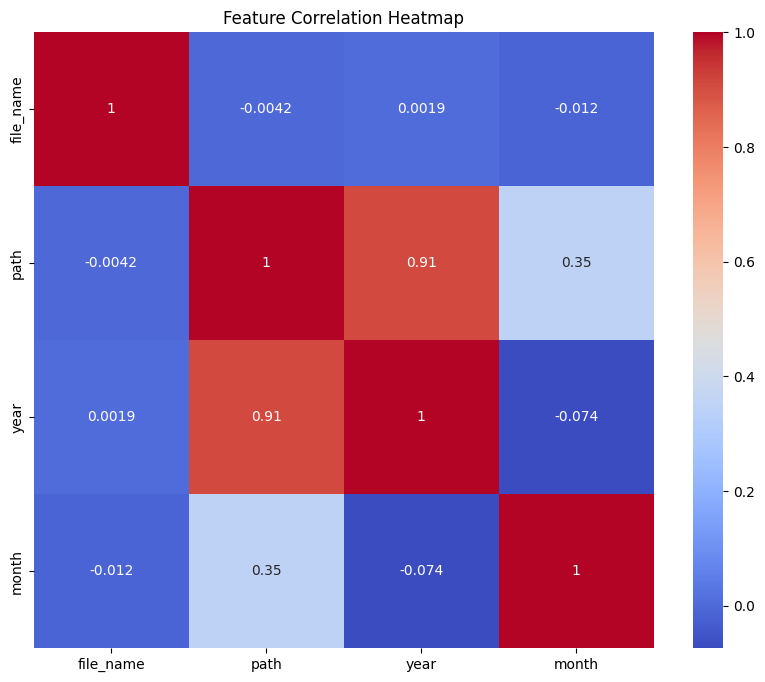

In [ ]:
# Correlation matrix heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

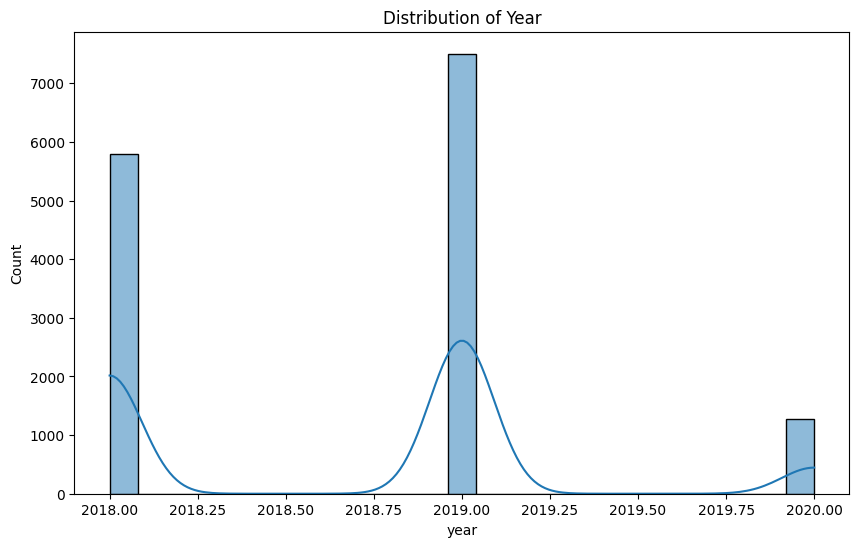

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['year'], kde=True)
plt.title('Distribution of Year')
plt.show()

In [ ]:

label_encoder = LabelEncoder()
data_set_two['file_name'] = label_encoder.fit_transform(data_set_two['file_name'])
data_set_two['sha256_hash'] = label_encoder.fit_transform(data_set_two['sha256_hash'])
data_set_two['year'] = label_encoder.fit_transform(data_set_two['year'])
data_set_two['method'] = label_encoder.fit_transform(data_set_two['method'])
data['family_name']=label_encoder.fit_transform(data['family_name'])


In [ ]:
X = data_set_two
y = data['family_name']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:

print(f'Classification Report:\n{classification_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.03      0.02      0.02        48
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         6
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00        10
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         5
          19       0.00      0.00      0.00         5
          20       0.00      0.00      0.00         1
    

In [ ]:
def read_sets(csv_file):
  data_frame=pd.read_csv(csv_file)
  return data_frame

In [ ]:
def Predict():
  new_data_list = [read_sets('/content/16279.csv')]

  # Create an empty list to store the predictions for each dataset
  all_predictions = []
  all_file_name_predictions = []
  all_family_name_predictions = []
  # Iterate through new datasets and make predictions
  for new_data in tqdm(new_data_list, desc="Making Predictions"):

      label_encoder = LabelEncoder()
      new_data['file_name'] = label_encoder.fit_transform(new_data['file_name'])
      new_data['sha256_hash'] = label_encoder.fit_transform(new_data['sha256_hash'])
      new_data['year'] = label_encoder.fit_transform(new_data['year'])
      new_data['method'] = label_encoder.fit_transform(new_data['method'])
      new_X = new_data.drop(['path',	'month',	'quarter'], axis=1)  # Exclude the target variable
      new_predictions = model.predict(new_X)
      all_predictions.append(new_predictions)
      file_name_predictions = model.predict(new_X)
      all_file_name_predictions.append(file_name_predictions)

    # Predict family_name
      family_name_X = new_data.drop(['path', 'month', 'quarter'], axis=1)
      family_name_predictions = model.predict(family_name_X)
      all_family_name_predictions.append(family_name_predictions)
  for i, file_name_predictions in enumerate(all_file_name_predictions):
    print(f"Predicted File Names for new_data_{i+1}:")
    print(file_name_predictions)


  return all_predictions


In [ ]:
Predict()

Making Predictions: 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]

Predicted File Names for new_data_1:
[ 5 30 68 ... 68 68 68]
Predicted Malware Families for new_data_1:
[ 5 30 68 ... 68 68 68]


[array([ 5, 30, 68, ..., 68, 68, 68])]